# Tratamento dos Dados

In [10]:
import pandas as pd

In [11]:
spam = pd.read_csv('spam.csv')
spam.drop(columns=['Unnamed: 0', 'label_num'], axis=1, inplace=True)
spam.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [12]:
spam['label'].value_counts()

label
ham     3672
spam    1499
Name: count, dtype: int64

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(spam['text'])
y = spam['label'].values

X.shape, y.shape

((5171, 50447), (5171,))

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Treinamento

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train);

# Previsões e Teste

In [8]:
predictions = rf.predict(X_test)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1122
        spam       0.96      0.97      0.97       430

    accuracy                           0.98      1552
   macro avg       0.98      0.98      0.98      1552
weighted avg       0.98      0.98      0.98      1552



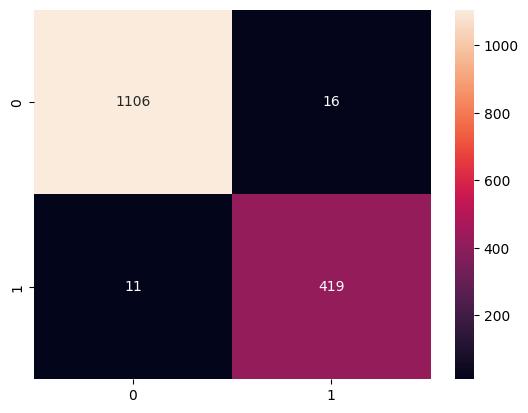

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g');